Useful tables:-
- Posts
- Users
- Comments
- Tags
- Votes

##### Run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019.

select id, posttypeid, creationdate, score,
viewcount, tags, answercount, favoritecount 
from posts
where posttypeid = 1 and year(creationDate) = 2019

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [4]:
df.info()
# favoritecount has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
df['FavoriteCount'].value_counts()
# maybe we can fill the null values with 0

1.0     953
2.0     205
0.0     175
3.0      43
4.0      12
5.0       8
6.0       4
7.0       4
11.0      1
8.0       1
16.0      1
Name: FavoriteCount, dtype: int64

In [6]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [7]:
df['Tags'] = (df['Tags'].str.replace('><', ',')
              .str.replace('<', '')
              .str.replace('>', '')
              .str.split(pat=',')
             )

In [8]:
## Count how many times each tag was used.

tags = df['Tags'].values
used_dict = {}

for tag in tags:
    for t in tag:
        if t in used_dict:
            used_dict[t] += 1
        else:
            used_dict[t] = 1
            

In [9]:
used_df = pd.DataFrame.from_dict({'used_count': used_dict})

In [10]:
most_used = used_df.sort_values(by = 'used_count', ascending=False).head(20)

In [11]:
## Count how many times each tag was viewed.

view_dict = {}
for i, j in df.iterrows():
    view_count = j['ViewCount']
    tags = j['Tags']
    for t in tags:
        if t in view_dict:
            view_dict[t] += view_count
        else:
            view_dict[t] = view_count

In [12]:
view_df = pd.DataFrame.from_dict({'view_count': view_dict})

In [13]:
most_viewed = view_df.sort_values(by='view_count', ascending=False).head(20)

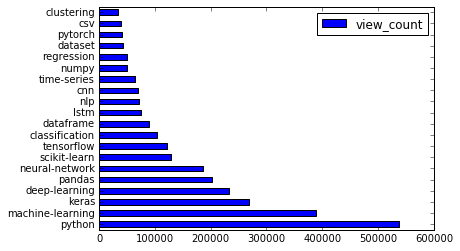

In [14]:
## Plot how many times each tag was viewed - top 20

most_viewed.plot.barh()

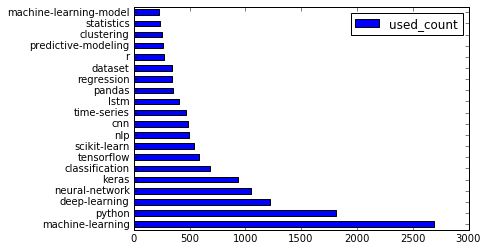

In [15]:
## Plot how many times each tag was used - top 20

most_used.plot.barh()

In [16]:
# Check which tags are most related to deep-learning 
# same methology will also be used later on
# Lets count the occurence of 'deep learning' tag with other tags


In [17]:
used_df.index

Index(['.net', '3d-object-detection', '3d-reconstruction', 'ab-test',
       'accuracy', 'activation', 'activation-function', 'active-learning',
       'activity-recognition', 'actor-critic',
       ...
       'weighted-data', 'weka', 'wikipedia', 'wolfram-language', 'word',
       'word-embeddings', 'word2vec', 'xboost', 'xgboost', 'yolo'],
      dtype='object', length=526)

In [18]:
df

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,NaN
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,NaN
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,NaN
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,NaN
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,NaN
5,44430,2019-01-23 11:13:32,0,283,[fuzzy-logic],1,NaN
6,44432,2019-01-23 11:17:46,1,214,"[time-series, anomaly-detection, online-learning]",0,1.0
7,44436,2019-01-23 12:49:39,0,9,[matrix-factorisation],0,NaN
8,44437,2019-01-23 13:04:11,0,7,"[correlation, naive-bayes-classifier]",0,NaN
9,44438,2019-01-23 13:16:29,0,584,"[machine-learning, python, deep-learning, kera...",1,NaN


In [19]:
most_used_tags = used_df.index

In [20]:
corr_df = pd.DataFrame(index=most_used_tags, columns=most_used_tags)

In [21]:
corr_df.fillna(0, inplace=True)

In [22]:
for tags in df['Tags']:
    corr_df.loc[tags, tags] += 1

In [23]:
corr_df.loc[most_used.index, most_used.index]

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [24]:
corr_df.loc[most_used.index, 'deep-learning']

machine-learning           429
python                     160
deep-learning             1220
neural-network             305
keras                      247
classification              59
tensorflow                 136
scikit-learn                16
nlp                         72
cnn                        160
time-series                 44
lstm                       103
pandas                       1
regression                  21
dataset                     32
r                            5
predictive-modeling         32
clustering                   2
statistics                  12
machine-learning-model      19
Name: deep-learning, dtype: int64

##### Deep Learning is seen the most with following tags
- machine-learning
- python
- neural-network
- keras
- tensorflow
- cnn
- lstm

### Read all questions

In [25]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [26]:
all_questions.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [27]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [28]:
all_questions.agg({'CreationDate': ['min', 'max']})

,CreationDate
min,2014-05-13 23:58:30
max,2020-01-19 03:01:03


In [29]:
all_questions['Tags'] = (
            all_questions['Tags'].str.replace('><', ',')
              .str.replace('<', '')
              .str.replace('>', '')
              .str.split(pat=',')
             )

In [30]:
## First time frame every 6 months

## Second time frame every quarter

In [31]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [32]:
def is_deep_learning(x):
    for _x in x:
        if _x in ['neural-network', 'keras', 'tensorflow', 'cnn', 'lstm', 'deep-learning']:
            return 1
    return 0

all_questions['deep_learning'] = all_questions['Tags'].apply(is_deep_learning)

In [33]:
all_questions.head(10)

,Id,CreationDate,Tags,deep_learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


In [34]:
def half_yearly(x):
    year = x.year
    month = x.month
    half_year = str(((month-1) // 6) + 1)
    return '{0}-H{1}'.format(year, half_year)

def quarterly(x):
    year = x.year
    month = x.month
    quarter = str(((month-1) // 3) + 1)
    return '{0}-Q{1}'.format(year, quarter)

In [35]:
all_questions['half_yearly'] = all_questions['CreationDate'].apply(half_yearly)
all_questions['quarterly'] = all_questions['CreationDate'].apply(quarterly)


In [36]:
interested_mask = (all_questions['CreationDate'] > '2014-06-01') & (all_questions['CreationDate'] < '2020-01-01')
interested_timeframe = all_questions[interested_mask]



In [37]:
interested_timeframe.head(10)

,Id,CreationDate,Tags,deep_learning,half_yearly,quarterly
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,2019-H1,2019-Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019-H1,2019-Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019-H1,2019-Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019-H1,2019-Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019-H1,2019-Q1
5,45428,2019-02-12 05:43:18,[cnn],1,2019-H1,2019-Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,2019-H1,2019-Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,2019-H1,2019-Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1,2019-H1,2019-Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,2019-H1,2019-Q1


In [38]:
half_yearly_agg = (interested_timeframe
                   .groupby('half_yearly')
                   .agg({'deep_learning': ['sum', 'size']})
                  )



In [39]:
half_yearly_agg

deep_learning      
                      sum  size
half_yearly                    
2014-H1                 6    99
2014-H2                23   405
2015-H1                34   474
2015-H2                80   693
2016-H1               157  1034
2016-H2               260  1112
2017-H1               399  1345
2017-H2               501  1612
2018-H1               946  2669
2018-H2              1065  2806
2019-H1              1510  4380
2019-H2              1505  4430

In [40]:
quarterly_agg = (interested_timeframe
                   .groupby('quarterly')
                   .agg({'deep_learning': ['sum', 'size']})
                  )

In [41]:
quarterly_agg

deep_learning      
                    sum  size
quarterly                    
2014-Q2               6    99
2014-Q3               8   189
2014-Q4              15   216
2015-Q1              14   190
2015-Q2              20   284
2015-Q3              28   311
2015-Q4              52   382
2016-Q1              79   516
2016-Q2              78   518
2016-Q3             121   585
2016-Q4             139   527
2017-Q1             207   698
2017-Q2             192   647
2017-Q3             207   714
2017-Q4             294   898
2018-Q1             456  1221
2018-Q2             490  1448
2018-Q3             613  1512
2018-Q4             452  1294
2019-Q1             693  1987
2019-Q2             817  2393
2019-Q3             798  2394
2019-Q4             707  2036

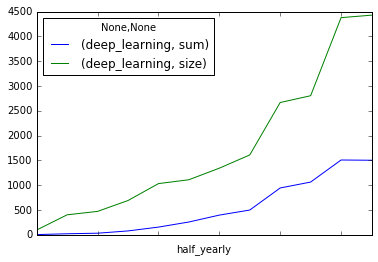

In [45]:
half_yearly_agg.plot.line()

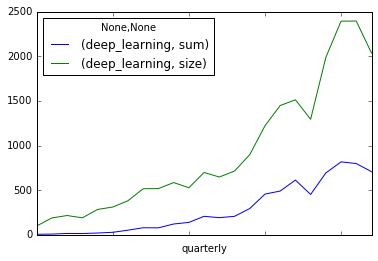

In [43]:
quarterly_agg.plot.line()

In [44]:
# Looks like the trend is going down recently